# Loading the .csv files

In [3]:
import pandas as pd

In [4]:
transactions = pd.read_csv('transactions.csv')
products = pd.read_csv('products.csv')
customers = pd.read_csv('customers.csv')

# Part A: Data Loading & Basic Operations

## Basic Exploration

In [5]:
transactions.shape

(10015, 7)

In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  10015 non-null  int64  
 1   customer_id     10015 non-null  int64  
 2   product_id      10015 non-null  int64  
 3   quantity        9918 non-null   float64
 4   price           9913 non-null   float64
 5   timestamp       10015 non-null  object 
 6   payment_method  9914 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 547.8+ KB


In [7]:
transactions.head(3)

,transaction_id,customer_id,product_id,quantity,price,timestamp,payment_method
0,4292,130,89,1.0,112.87,2024-08-17 09:13:00,Credit Card
1,9107,271,98,1.0,211.90,2023-11-17 20:50:00,PayPal
2,7842,66,33,1.0,225.04,2023-03-21 23:23:00,Bank Transfer


In [8]:
products.shape

(150, 5)

In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    150 non-null    int64  
 1   product_name  150 non-null    object 
 2   category      147 non-null    object 
 3   supplier_id   150 non-null    int64  
 4   cost_price    150 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.0+ KB


In [10]:
products.head(3)

,product_id,product_name,category,supplier_id,cost_price
0,1,Product_OFF_0,Toys,28,113.16
1,2,Product_SPO_1,Books,43,166.06
2,3,Product_SPO_2,Books,47,128.13


In [11]:
customers.shape

(2000, 6)

In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    2000 non-null   int64  
 1   customer_name  2000 non-null   object 
 2   email          1947 non-null   object 
 3   signup_date    2000 non-null   object 
 4   country        2000 non-null   object 
 5   age            1900 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 93.9+ KB


In [13]:
customers.head(3)

,customer_id,customer_name,email,signup_date,country,age
0,1,Customer41,customer410@yahoo.com,2022-01-28,UK,30.0
1,2,Custome41,custome411@email.com,2023-10-28,Mexico,29.0
2,3,customer41,customer412@email.com,2023-04-05,Australia,69.0


In [14]:
# Number of duplicate transaction_id entries
transactions.duplicated('transaction_id').sum()

15

## Datetime Transformation

In [15]:
# converting object datatype to datetime
transactions['timestamp'] = pd.to_datetime(transactions['timestamp'])

In [22]:
# extraction

transactions['hour'] = transactions['timestamp'].dt.hour

transactions['day'] = transactions['timestamp'].dt.day

transactions['day_name'] = transactions['timestamp'].dt.day_name()

transactions['month'] = transactions['timestamp'].dt.month_name()

transactions['year'] = transactions['timestamp'].dt.year

transactions.head()

,transaction_id,customer_id,product_id,quantity,price,timestamp,payment_method,hour,day,day_name,month,year
0,4292,130,89,1.0,112.87,2024-08-17 09:13:00,Credit Card,9,17,Saturday,August,2024
1,9107,271,98,1.0,211.90,2023-11-17 20:50:00,PayPal,20,17,Friday,November,2023
2,7842,66,33,1.0,225.04,2023-03-21 23:23:00,Bank Transfer,23,21,Tuesday,March,2023
3,3485,432,73,1.0,72.20,2024-11-18 17:04:00,Cash,17,18,Monday,November,2024
4,8929,248,11,1.0,315.22,2024-09-14 19:19:00,Cash,19,14,Saturday,September,2024


In [17]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  10015 non-null  int64         
 1   customer_id     10015 non-null  int64         
 2   product_id      10015 non-null  int64         
 3   quantity        9918 non-null   float64       
 4   price           9913 non-null   float64       
 5   timestamp       10015 non-null  datetime64[ns]
 6   payment_method  9914 non-null   object        
 7   hour            10015 non-null  int32         
 8   day             10015 non-null  int32         
 9   day_name        10015 non-null  object        
 10  month           10015 non-null  object        
 11  year            10015 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(3)
memory usage: 821.7+ KB


In [18]:
# Date range of transactions (earliest and latest)
print(f"Earliest Transaction : {transactions['timestamp'].min()}")
print(f"Latest Transaction : {transactions['timestamp'].max()}")

Earliest Transaction : 2023-01-01 00:39:00
Latest Transaction : 2024-12-31 22:18:00


# Part B: Data Cleaning & Transformation

## Handling Missing Values

In [23]:
# importing SimpleImputer for filling missing data
from sklearn.impute import SimpleImputer

# importing ColumnTransformer for imputing multiple columns
from sklearn.compose import ColumnTransformer

# importing visualization libraries to showcase data distribution
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# creating two imputer each one for numerical and categorical columns
imputer_n = SimpleImputer(strategy= 'median')
imputer_c = SimpleImputer(strategy= 'most_frequent')

In [27]:
# calculating percentage of null values
transactions.isnull().mean() * 100

transaction_id    0.000000
customer_id       0.000000
product_id        0.000000
quantity          0.968547
price             1.018472
timestamp         0.000000
payment_method    1.008487
hour              0.000000
day               0.000000
day_name          0.000000
month             0.000000
year              0.000000
dtype: float64

In [71]:
# imputing the columns having missing values

trf = ColumnTransformer( transformers= [('tnf1', imputer_n, ['quantity', 'price']),
                                        ('tnf2', imputer_c, ['payment_method'])], 
                         remainder= 'passthrough', verbose_feature_names_out=False
                       ).set_output(transform='pandas')

transactions_trf = trf.fit_transform(transactions)

trf.named_transformers_['tnf1'].statistics_, trf.named_transformers_['tnf2'].statistics_

(array([  2.  , 173.02]), array(['Bank Transfer'], dtype=object))

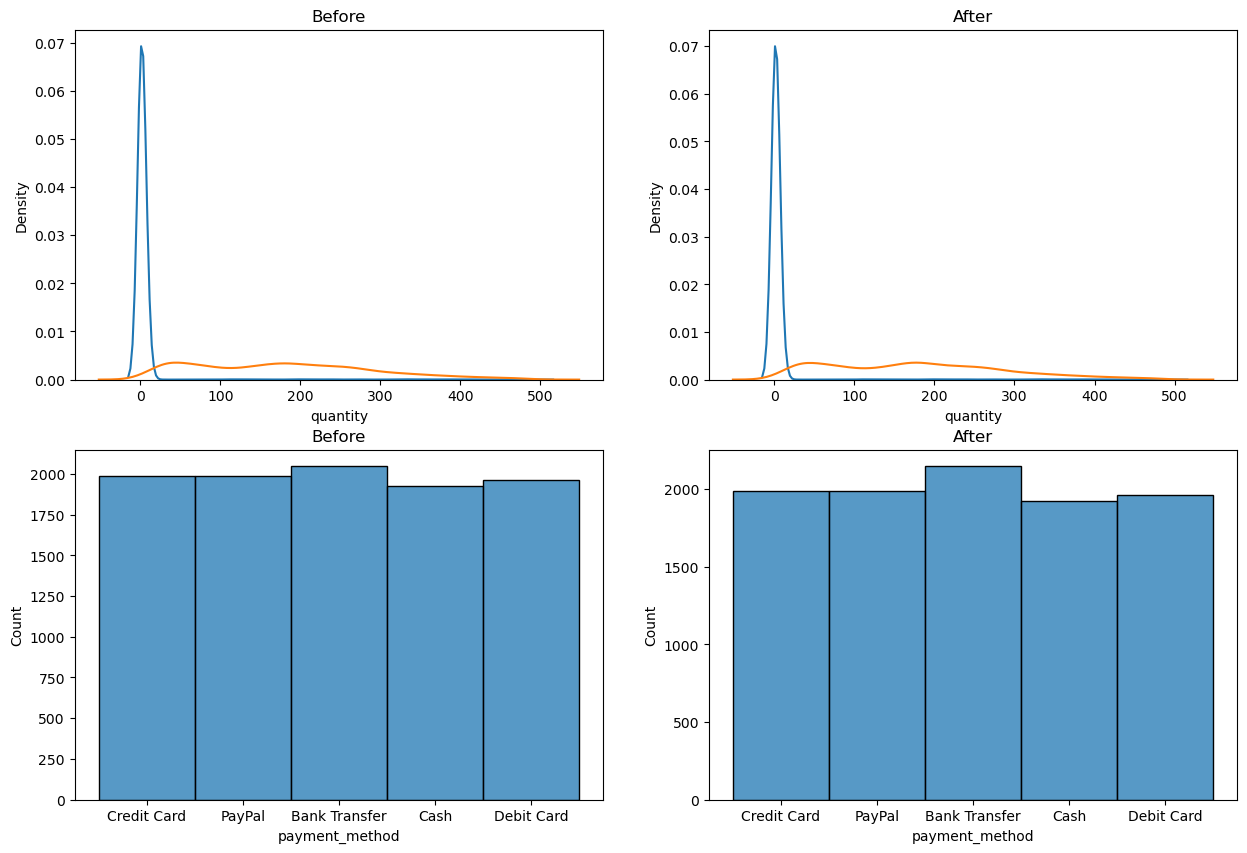

In [114]:
# showcasing data distribution before and after filling null values

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

sns.kdeplot(data=transactions, x='quantity', ax=ax[0,0], label='quantity')
sns.kdeplot(data=transactions, x='price', ax=ax[0,0], label='price')
ax[0,0].set_title('Before')

sns.kdeplot(data=transactions_trf, x='quantity', ax=ax[0,1], label='quantity')
sns.kdeplot(data=transactions_trf, x='price', ax=ax[0,1], label='price')
ax[0,1].set_title('After')

sns.histplot(data = transactions, x='payment_method', ax = ax[1,0])
ax[1,0].set_title('Before')

sns.histplot(data = transactions_trf, x='payment_method', ax = ax[1,1])
ax[1,1].set_title('After')

plt.show()

In [74]:
# calculating percentage of null values
customers.isnull().mean() * 100

customer_id      0.00
customer_name    0.00
email            2.65
signup_date      0.00
country          0.00
age              5.00
dtype: float64

In [89]:
print(customers['email'].nunique())
print(customers['email'].isnull().sum())
print(customers.shape)

1947
53
(2000, 6)


In [90]:
# imputing the columns having missing values

trf2 = ColumnTransformer( transformers= [('tnf3', imputer_n, ['age']),
                                        ('tnf4', SimpleImputer(strategy='constant', fill_value='Missing'), ['email'])], 
                         remainder= 'passthrough', verbose_feature_names_out=False
                       ).set_output(transform='pandas')

customers_trf = trf2.fit_transform(customers)

trf2.named_transformers_['tnf3'].statistics_, trf2.named_transformers_['tnf4'].statistics_

(array([46.]), array(['Missing'], dtype=object))

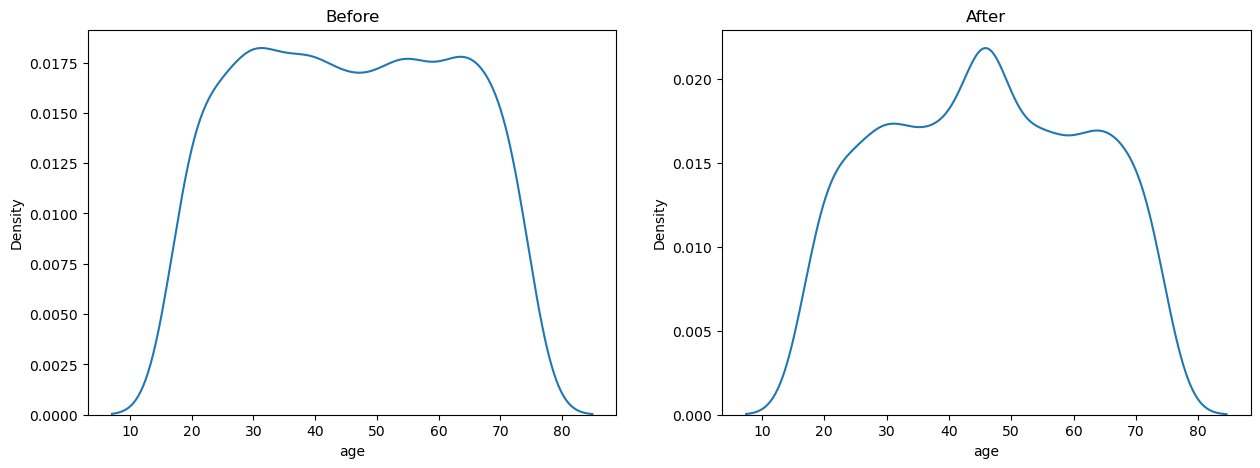

In [109]:
# showcasing data distribution before and after filling null values

fig, ax = plt.subplots(ncols = 2, figsize = (15, 5))

sns.kdeplot(data=customers, x='age', ax=ax[0])
ax[0].set_title('Before')

sns.kdeplot(data=customers_trf, x='age', ax=ax[1])
ax[1].set_title('After')

plt.show()

In [91]:
# calculating percentage of null values
products.isnull().mean() * 100

product_id      0.0
product_name    0.0
category        2.0
supplier_id     0.0
cost_price      0.0
dtype: float64

In [95]:
products['category'].nunique()

10

In [99]:
trf3 = ColumnTransformer( transformers= [ ('tnf4', imputer_c, ['category']) ], remainder= 'passthrough',
                          verbose_feature_names_out=False
                        ).set_output(transform='pandas')

products_trf = trf3.fit_transform(products)

trf3.named_transformers_['tnf4'].statistics_

array(['Toys'], dtype=object)

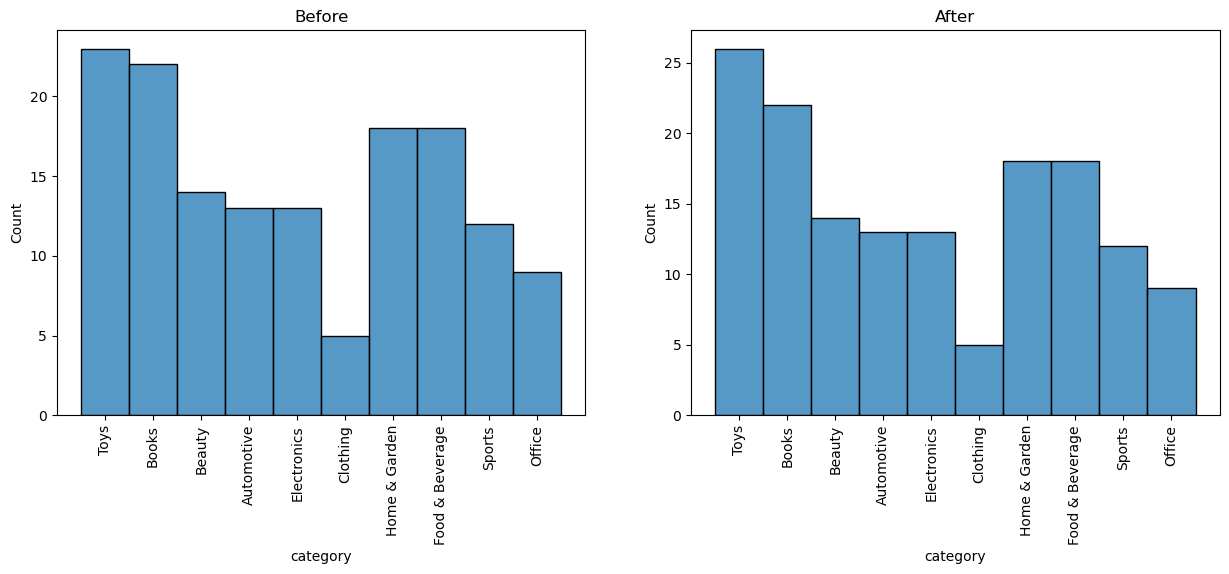

In [112]:
# showcasing data distribution before and after filling null values

fig, ax = plt.subplots(ncols = 2, figsize = (15, 5))

sns.histplot(data=products, x='category', ax=ax[0])
ax[0].set_title('Before')
ax[0].tick_params(axis='x', rotation=90)

sns.histplot(data=products_trf, x='category', ax=ax[1])
ax[1].set_title('After')
ax[1].tick_params(axis='x', rotation=90)

plt.show()

## Revenue Calculation

In [116]:
# revenue = quantity × price
transactions_trf['revenue'] = transactions_trf['quantity'] * transactions_trf['price']

transactions_trf.sample(5)

,quantity,price,payment_method,transaction_id,customer_id,product_id,timestamp,hour,day,day_name,month,year,revenue
9114,2.0,69.66,Credit Card,6355,293,82,2024-07-13 16:19:00,16,13,Saturday,July,2024,139.32
3493,2.0,242.45,PayPal,1254,1068,9,2024-07-27 18:48:00,18,27,Saturday,July,2024,484.90
410,1.0,47.72,Bank Transfer,4942,520,81,2024-12-24 08:59:00,8,24,Tuesday,December,2024,47.72
9737,1.0,128.71,Debit Card,1105,1981,90,2024-02-19 05:24:00,5,19,Monday,February,2024,128.71
6265,1.0,394.50,Bank Transfer,9694,363,40,2024-08-25 13:46:00,13,25,Sunday,August,2024,394.50


## Merge Datasets

In [121]:
full_data = transactions_trf.merge(customers_trf, on = 'customer_id', how = 'left')
full_data = full_data.merge(products_trf, on = 'product_id', how = 'left')

In [124]:
# If len(full_data) == len(transactions_trf) then there is no data loss from transactions dataframe
len(full_data) == len(transactions_trf)

True

## Profit Margin

In [141]:
# profit_margin = (price - cost_price) / price × 100

full_data['profit_margin'] = (full_data['price'] - full_data['cost_price'])/ full_data['price'] * 100
full_data.head()

,quantity,price,payment_method,transaction_id,customer_id,product_id,timestamp,hour,day,day_name,...,age,email,customer_name,signup_date,country,category,product_name,supplier_id,cost_price,profit_margin
0,1.0,112.87,Credit Card,4292,130,89,2024-08-17 09:13:00,9,17,Saturday,...,40.0,customer_129129@yahoo.com,Customer_129,2023-12-20,Canada,Books,Product_HOM_88,2,59.72,47.089572
1,1.0,211.90,PayPal,9107,271,98,2023-11-17 20:50:00,20,17,Friday,...,21.0,customer_270270@email.com,Customer_270,2022-11-09,India,Home & Garden,Product_BOO_97,26,84.89,59.938650
2,1.0,225.04,Bank Transfer,7842,66,33,2023-03-21 23:23:00,23,21,Tuesday,...,62.0,customer_6565@email.com,Customer_65,2023-08-08,Canada,Electronics,Product_BOO_32,22,103.61,53.959296
3,1.0,72.20,Cash,3485,432,73,2024-11-18 17:04:00,17,18,Monday,...,64.0,customer_431431@gmail.com,Customer_431,2023-10-29,India,Home & Garden,Product_OFF_72,31,39.53,45.249307
4,1.0,315.22,Cash,8929,248,11,2024-09-14 19:19:00,19,14,Saturday,...,64.0,customer_247247@company.com,Customer_247,2022-09-15,Mexico,Clothing,Product_TOY_10,14,127.00,59.710678


# Part C: Aggregation & Analysis 

## C1. Customer Metrics

In [130]:
cust_met = full_data.groupby('customer_name').agg(total_revenue = ('revenue', 'sum'),
                                                   number_transactions = ('transaction_id', 'count'),
                                                   avg_transaction_value= ('revenue', 'mean'),
                                                   most_frequent_category= ('category',  lambda x: x.mode()[0]))
cust_met.sort_values('total_revenue', ascending=False)
cust_met

,total_revenue,number_transactions,avg_transaction_value,most_frequent_category
customer_name,,,,
Custome14,7856.290000,32,245.509062,Books
Custome15,7292.820000,23,317.079130,Electronics
Custome16,3755.640000,6,625.940000,Clothing
Custome18,505.320000,3,168.440000,Books
Custome2,1004.330000,4,251.082500,Automotive
...,...,...,...,...
customer48,20743.487495,48,432.155989,Toys
customer6,1525.540000,7,217.934286,Sports
customer7,607.970000,3,202.656667,Home & Garden


## C2. Time-Based Analysis

In [144]:
time_analysis = full_data.groupby(['year', 'month']).agg(total_revenue = ('revenue', 'sum'),
                                                         unique_customer = ('customer_name', 'nunique'),
                                                         avg_order_value= ('revenue', 'mean')).reset_index()
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

time_analysis['month_num'] = time_analysis['month'].map(month_order)
time_analysis = time_analysis.sort_values(['year', 'month_num']).reset_index(drop=True)
time_analysis['mom_growth_rate_revenue'] = time_analysis['total_revenue'].pct_change() * 100

time_analysis = time_analysis.drop('month_num', axis=1)
time_analysis

,year,month,total_revenue,unique_customer,avg_order_value,mom_growth_rate_revenue
0,2023,January,193405.812589,348,398.774871,NaN
1,2023,February,165296.517903,311,387.111283,-14.533842
2,2023,March,183939.273323,341,399.867985,11.278372
3,2023,April,183610.501489,357,385.736348,-0.178739
4,2023,May,195409.945890,343,433.281476,6.426345
5,2023,June,186558.193322,349,413.654531,-4.529837
6,2023,July,153394.852946,318,376.891531,-17.776405
7,2023,August,158577.063314,325,387.718981,3.378347
8,2023,September,145291.399615,283,409.271548,-8.378049
9,2023,October,156503.762443,302,412.938687,7.717155


## C3. Product Performance

In [152]:
performance_r = full_data.groupby('product_name').agg(total_revenue = ('revenue', 'sum')).sort_values('total_revenue', ascending=False)
performance_q = full_data.groupby('product_name').agg(quantity_sold = ('quantity', 'sum')).sort_values('quantity_sold', ascending=False)
performance_p = full_data.groupby('product_name').agg(profit_margin = ('profit_margin', 'mean')).sort_values('profit_margin', ascending=False)

print("Top 10 by Revenue:")
print(performance_r.head(10))

print("\nTop 10 by Quantity Sold:")
print(performance_q.head(10))

print("\nTop 10 by Profit Margin:")
print(performance_p.head(10))

Top 10 by Revenue:
                 total_revenue
product_name                  
Product_OFF_100   95005.120000
Product_OFF_59    78366.194739
Product_OFF_47    71998.077896
Product_CLO_115   66416.407761
Product_ELE_91    65408.500000
Product_AUT_124   56546.750931
Product_ELE_74    55931.400000
Product_AUT_117   55178.950000
Product_OFF_107   54293.740000
Product_TOY_7     52609.010000

Top 10 by Quantity Sold:
                 quantity_sold
product_name                  
Product_SPO_40          1751.0
Product_SPO_37          1475.0
Product_BOO_38          1252.0
Product_CLO_115         1209.0
Product_BOO_131         1133.0
Product_HOM_27          1122.0
Product_HOM_130         1118.0
Product_OFF_59          1115.0
Product_AUT_46          1106.0
Product_BOO_14           992.0

Top 10 by Profit Margin:
                 profit_margin
product_name                  
Product_AUT_120      48.587045
Product_OFF_85       47.394337
Product_CLO_87       47.035482
Product_ELE_103      46.875853